# **Partícula en un Campo Eléctrico**

## **Análisis teórico**

Consideremos un anillo de $n$ cargas positivas en el plano $yz$ con radio $R$. Cada carga puntual tiene carga $+q$. Un electrón (carga $-e$), masa ($m_e$) se mueve bajo la influencia de la fuerza de Coulomb generada por este anillo.  

### **Cálculo del Campo Eléctrico**  
Las posiciones de las $n$ cargas están dadas por:  
$$\vec{r}_i = \left(0, R\cos\theta_i, R\sin\theta_i\right), \quad \theta_i = \frac{2\pi i}{n}$$

El campo eléctrico en la posición $\vec{r} = (x,y,z)$ es:  

$$\vec{E}(\vec{r}) = kq\sum_{i=0}^{n-1} \frac{\vec{r} - \vec{r}_i}{|\vec{r} - \vec{r}_i|^3}$$

donde $k = \frac{1}{4\pi\epsilon_0}$.  

Para una distribución de carga continua ( $n \to \infty$ ):  

$$\vec{E}(\vec{r}) = \frac{k\lambda R}{4\pi}\int_0^{2\pi} \frac{(x, y-R\cos\phi, z-R\sin\phi)}{[x^2 + (y-R\cos\phi)^2 + (z-R\sin\phi)^2]^{3/2}}d\phi$$

### **Ecuaciones de Movimiento**  
El movimiento del electrón está gobernado por:  

$$m_e\frac{d^2\vec{r}}{dt^2} = -e\vec{E}(\vec{r})$$

Convertido a un sistema de primer orden:  

$$
\frac{d}{dt}
\begin{bmatrix}
x \\ y \\ z \\ v_x \\ v_y \\ v_z
\end{bmatrix} = 
\begin{bmatrix}
v_x \\ v_y \\ v_z \\ -eE_x/m_e \\ -eE_y/m_e \\ -eE_z/m_e
\end{bmatrix}
$$

### **Formulación Adimensional**  
Usando unidades naturales:  
- Longitud: $a = R$  
- Carga: $e$
- Tiempo: $\tau = \sqrt{\frac{m_e a^3}{k e^2}}$  

Variables adimensionales:  

$$\tilde{t} = t/\tau, \quad \tilde{\vec{r}} = \vec{r}/a$$
$$
Ecuaciones adimensionales:  
\frac{d}{d\tilde{t}}
\begin{bmatrix}
\tilde{x} \\ \tilde{y} \\ \tilde{z} \\ \tilde{v}_x \\ \tilde{v}_y \\ \tilde{v}_z
\end{bmatrix} = 
\begin{bmatrix}
\tilde{v}_x \\ \tilde{v}_y \\ \tilde{v}_z \\ -\tilde{E}_x \\ -\tilde{E}_y \\ -\tilde{E}_z
\end{bmatrix}
$$

### **Implementación Numérica**  
El método de Runge-Kutta de cuarto orden (RK4) resuelve:  

$$\frac{d\vec{Y}}{dt} = \vec{f}(t,\vec{Y})$$

donde $\vec{Y} = [x,y,z,v_x,v_y,v_z]^T$.  

Cada paso de RK4 calcula:  

$$
\begin{aligned}
k_1 &= \Delta t \, \vec{f}(t_n, \vec{Y}_n) \\  
k_2 &= \Delta t \, \vec{f}(t_n+\Delta t/2, \vec{Y}_n+k_1/2) \\  
k_3 &= \Delta t \, \vec{f}(t_n+\Delta t/2, \vec{Y}_n+k_2/2) \\  
k_4 &= \Delta t \, \vec{f}(t_n+\Delta t, \vec{Y}_n+k_3) \\  
\vec{Y}_{n+1} &= \vec{Y}_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)  
\end{aligned}
$$  

### **Conservación de Energía**  
La energía total debe conservarse:  

$$E_{tot} = \frac{1}{2}m_e v^2 - e\phi(\vec{r})$$

donde $\phi$ es el potencial eléctrico.  

Esta formulación proporciona el marco teórico completo para simular el movimiento del electrón en el campo eléctrico del anillo mediante integración RK4.

In [1]:
import numpy as np
import ast

In [2]:
def load_data(file_path="data/electron_ring_simulation.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, x, y, z, vx, vy, vz, E_kin, E_pot, E_tot = data.T
    return t, x, y, z, vx, vy, vz, E_kin, E_pot, E_tot

def load_params(file_path="data/electron_ring_simulation_params.txt"): 
    with open(file_path) as f:
        params = ast.literal_eval(f.read())
    return params

In [3]:
from electron_on_charged_field import ChargedRingSystem, Simulator
from animator import ElectronTrajectoryAnimator
from plotting import plot_3d_trajectory, plot_energy

In [4]:
n_charges = 50
ring_radius = 1.0
charge_ring = 50.0e-9
electron_position = [-1.0, 2.0, -1.0]  # quasi-stable orbit
electron_velocity = [1.0e4, 0.0, 0.0]
dt=1.0e-9
t_max=7.0e-6
filename="quasi_estable_orbit"

system = ChargedRingSystem(
        n_charges=n_charges,
        ring_radius=ring_radius,
        charge_ring=charge_ring,
        electron_position=electron_position,
        electron_velocity=electron_velocity
    )
simulator = Simulator(system, filename)
simulator.simulate(t_max, dt)

Simulación completada. Datos guardados en data/quasi_estable_orbit.dat


In [5]:
t, x, y, z, vx, vy, vz, E_kin, E_pot, E_tot = load_data(file_path=f"data/{filename}.dat")

Gráfico guardado en plots/positions_quasi_estable_orbit.png


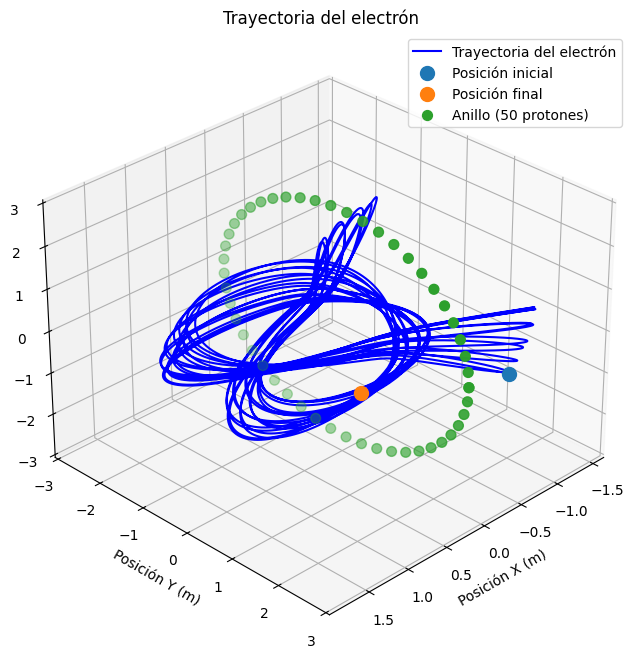

Gráfico guardado en plots/energies_quasi_estable_orbit.png


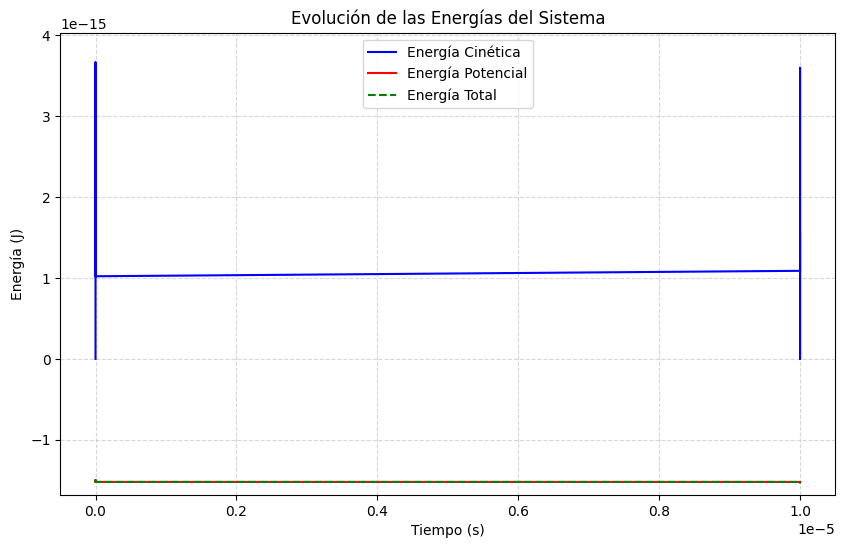

In [6]:
plot_3d_trajectory(n_charges, x=x, y=y, z=z, show=True, save=True, filename=filename)
plot_energy(time=t, E_kin=E_kin, E_pot=E_tot, E_tot=E_tot, save=True, show=True, filename=filename)

In [7]:
from animator import ElectronTrajectoryAnimator

In [ ]:
animator = ElectronTrajectoryAnimator(
         data_path="data/quasi_estable_orbit.dat",
         n_charges=n_charges,
         skip_frames=10
     )
animator.animate(output_file=f"{filename}.gif", fps=20)

Animación guardada en animations/electron_3d_trajectory.gif
